### 1. Importing main libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from holoviews import annotate
from matplotlib.pyplot import ylabel, legend
from matplotlib.ticker import FuncFormatter
from nest_asyncio import apply

## Common functions

In [2]:
# common functions 
import matplotlib.colors as mcolors

# render count plot
def render_count_plot(df, column, hue, xlabel, bigger=False):
    # setting up custom color palatte
    custom_palette = sns.color_palette(['#5aade0', '#beb6ed'])
    
    # default figure size
    figsize = (10,6)
    
    #if bigger chart is true increase the figure size
    if bigger:
        figsize=(14,10)
    
    fig, ax = plt.subplots(figsize=figsize, dpi=100)
    sns.countplot(x=column, hue=hue, data=df, palette=custom_palette)
    sns.set_theme(style="white")
    ax.set_title(column + ' Count Plot')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Loan count')
    
    # Grid only on the y-axis
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray')  
    
    # annotations on bars
    for p in ax.patches:
        height = int(p.get_height())  # Get the height as an integer
        if height > 0:
            ax.annotate(height, 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')
            
    #if bigger chart is true rotate the x axis labels      
    if bigger:
        plt.xticks(rotation=90)
        
    plt.show()

# render bar chart
def render_bar_chart(df, column_name, filter_column, filter_value):
    cmap = plt.get_cmap('RdBu')

    # Normalize the data to map values to a range (0 to 1) for the colormap
    norm = plt.Normalize(df[df[filter_column] == filter_value][column_name].value_counts().min(), df[df[filter_column] == filter_value][column_name].value_counts().max())

    # Apply the colormap to each bar's value
    colors = [cmap(norm(value)) for value in df[df[filter_column] == filter_value][column_name].value_counts()]


    ax = round((df[df[filter_column] == filter_value].groupby(by=column_name)[filter_column].count() / loan_df.groupby(by=column_name)[filter_column].count()) * 100).plot(kind='bar',title= column_name + ' with proportionate "charged Off" data', xlabel=column_name ,ylabel = 'Loan status (Charged Off %)',color=colors, figsize=(10, 6), fontsize=10)
    
    # Grid only on the y-axis
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7, color='gray')  
    
    # adding up % sign on y axis
    formatter = FuncFormatter(lambda x, pos: f'{x:.0f}%')
    ax.yaxis.set_major_formatter(formatter)
    
    # annotations
    for i, value in enumerate(round((df[df[filter_column] == filter_value].groupby(by=column_name)[filter_column].count() / loan_df.groupby(by=column_name)[filter_column].count())*100)):
        if ~np.isnan(value):
            ax.text(i, value + 0.5, int(value), ha='center', fontsize=10, va='center')
        
    plt.show()

# render box plot
def render_box_plot(data, title):
    sns.boxplot(data)
    sns.set_theme(style="whitegrid", color_codes=True)
    plt.title(title)
    plt.show()
    
# create data buckets for segments    
def bucketing (column, labels, thresholds_val):
    for i, threshold in enumerate(thresholds_val):
        if column < threshold:
            return labels[i]
    return labels[-1]

### 2. Loading the CSV file into a dataframe

In [3]:
loan_df = pd.read_csv('loan.csv')
loan_df

/var/folders/g3/94j3445j4l3fh_x5ch97jnm80000gn/T/ipykernel_1330/45414553.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_df = pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 3. Data Cleaning

#### a. Check if duplicate rows are there, if yes we could delete them but here we found none in this data set.
#### b. Remove columns with NA, where all the values are NA 
#### c. Finding out columns with only single value, for this analysis we could remove such columns as these would be of no help.
#### d. Finding out columns that have more than 65% NA values, we can safely drop them.
#### e. Dropping additional columns, which are of not much use in our analysis
#### f. cleaning up numerical columns and removing the non digit values like text, % etc
#### g. treating missing values 
        g. by updating the mode value to the missing values
        g. dropping rows as the values couldn't be assigned
        g. cleaning data by comibing the verification status 
        g. removing rows with the loan status as current as, we can't predict or do anything till the time loan is active to understand the behaviour
#### h. checking outliers and keeping the values lesser than 99th percentile for the 'annual_inc' column rest columns seems to be rightly distributed
#### i. derived column
        i. creating year and month columns to check the pattern of loans per year later
        i. creating buckets for annual income
        i. creating buckets for loan amount
        i. creating buckets for interest rates
#### j. Important variables on which we would run Univariate and Bivariate analysis
        1. Categorical variables
            1. Ordered categorical data
                1. grade
                2. sub_grade
                3. emp_length
                4. term
                5. issue_year
                6. issue_month
    
            2. Unordered categorical data
                1. addr_state
                2. home_ownership    
                3. purpose
                4. verification_status
                    
                    
        2. Quantitative variables
            1. annual_inc_bucket
            2. int_rate_bucket
            3. loan_amnt_bucket
#### k. Multivariate Analysis
#### l. Summary of Analysis        

In [4]:
#shape of the data
loan_df.shape

(39717, 111)

In [5]:
loan_df.duplicated().value_counts()

False    39717
Name: count, dtype: int64

In [6]:
# b. Remove columns with NA, where all the values are NA 
loan_df = loan_df.dropna(axis=1, how='all')

In [7]:
# c. Finding out columns with only single value, for this analysis we could remove such columns as these would be of no help.
loan_df = loan_df.drop(loan_df.columns[loan_df.nunique() == 1], axis=1)

In [8]:
# d. Finding out columns that have more than 65% NA values, we can safely drop them.
columns_with_65_percent_and_more_NA_values = loan_df.columns[round(loan_df.isna().sum() / len(loan_df), 2) * 100 >= 65]
loan_df = loan_df.drop(columns_with_65_percent_and_more_NA_values, axis=1)

In [9]:
# e. Dropping additional columns, which are of not much use in our analysis
cols_with_no_significance = ['collection_recovery_fee', 'delinq_2yrs', 'desc', 'earliest_cr_line', 'emp_title', 'id', 'inq_last_6mths', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'member_id', 'open_acc', 'out_prncp', 'out_prncp_inv', 'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 'title', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'url','zip_code']

loan_df = loan_df.drop(cols_with_no_significance, axis=1)

In [10]:
# e. Cleaning up numerical columns and removing the non digit values like text, % etc.
# Removing months from the column term
loan_df.term = loan_df.term.apply(lambda x: int(x[:3]))

# Removing % from the column int_rate
loan_df.int_rate = loan_df.int_rate.apply(lambda x: float(x[0:-1]))

In [11]:
loan_df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,NaN
39713,8500,8500,875.0,36,10.28,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,NaN
39714,5000,5000,1325.0,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,NaN
39715,5000,5000,650.0,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,NaN


In [12]:
# f. treating missing values
loan_df.emp_length.isna().sum()  # 1028 are missing

# fill na with Mode value
loan_df.emp_length = loan_df.emp_length.fillna(loan_df.emp_length.mode()[0])

# removing text 'years' and making it a numeric column 
loan_df.emp_length = loan_df.emp_length.str.extract(r'(\d+)')

# converting the data type to int
loan_df.emp_length = loan_df.emp_length.astype('int')


In [13]:
# pub_rec_bankruptcies has missing values but given the kind of data it has we can't fill these values hence dropping them, also given it's a small number of rows.
loan_df = loan_df[loan_df['pub_rec_bankruptcies'].notna()]

In [ ]:
# cleaning up the 'verification_status' column, by replacing the 'Source Verified' with 'Verified'
loan_df.verification_status.value_counts()
loan_df['verification_status'] = loan_df['verification_status'].apply(lambda x: 'Verified' if x == 'Source Verified' else x)

In [15]:
loan_df['verification_status'].value_counts()

verification_status
Verified        22795
Not Verified    16225
Name: count, dtype: int64

In [16]:
# removing rows with the loan status as current as, we can't predict or do anything till the time loan is active to understand the behaviour
loan_df = loan_df[~(loan_df['loan_status'] == 'Current')]

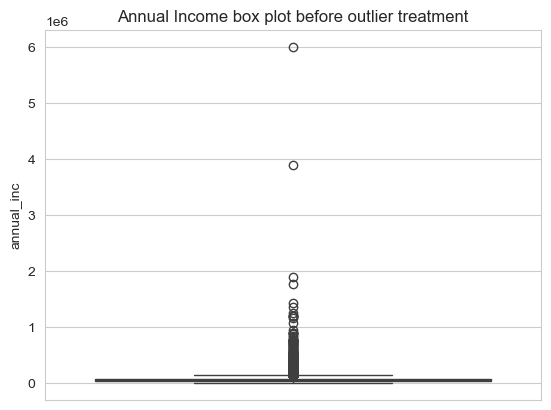

In [17]:
# checking outlier treatment - keeping the annual_inc value lesser than the 99th percentile.
render_box_plot(loan_df["annual_inc"], 'Annual Income box plot before outlier treatment')

In [18]:
#outlier treatment - keeping the annual_inc value lesser than the 99th percentile.
loan_df = loan_df[loan_df["annual_inc"] < loan_df["annual_inc"].quantile(0.99)]

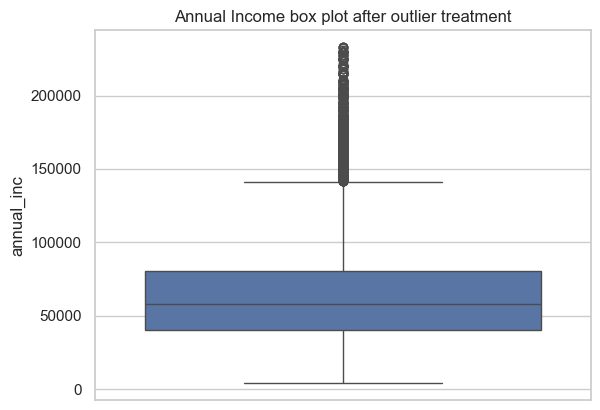

In [19]:
render_box_plot(loan_df["annual_inc"], 'Annual Income box plot after outlier treatment')


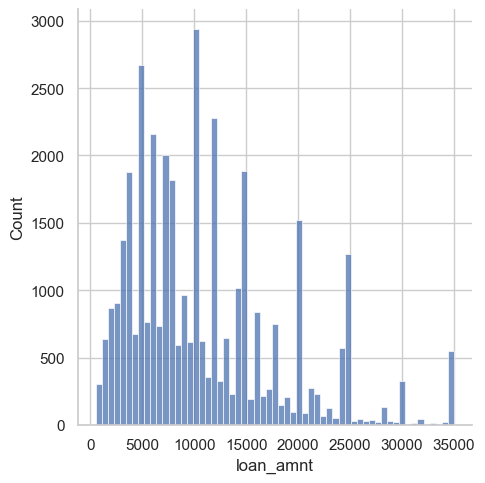

In [20]:
sns.displot(loan_df['loan_amnt'])
plt.show()

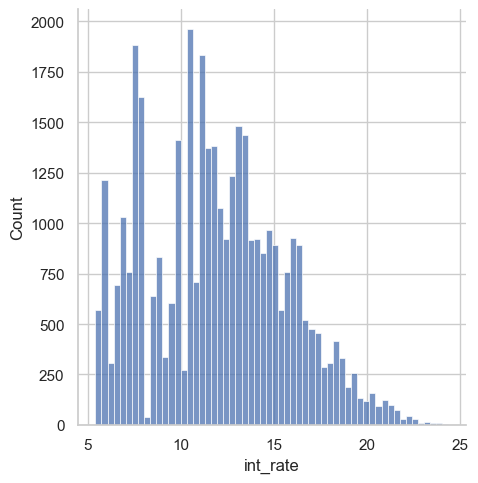

In [21]:
sns.displot(loan_df['int_rate'])
plt.show()

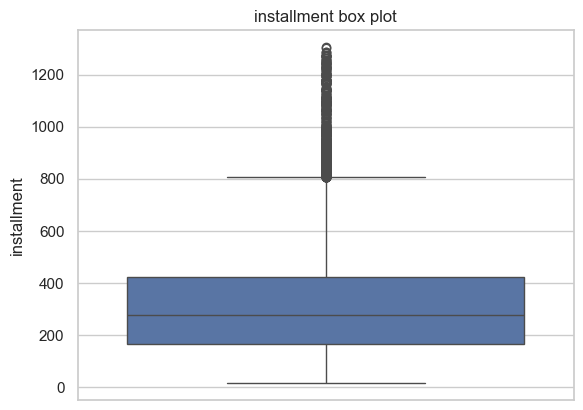

In [22]:
render_box_plot(loan_df["installment"], 'installment box plot')
plt.show()

#### Observation from above charts 
    1. Annual income required outlier correction and we have taken data lesser than 99th percentile
    2. Other fields such as loan amount, interest rate, installments etc are all well distributed and didn't require outlier treatment


In [23]:
# derived column
# creating year and month to check the pattern of loans per year later
loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['issue_year'] = loan_df.issue_d.dt.year
loan_df['issue_month'] = loan_df.issue_d.dt.month

In [24]:
# creating buckets for annual income
bins = [20000, 30000, 40000, 50000, 60000, 70000, 80000]
labels = ['0 - 20k', '20k - 30k', '30k - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan_df['annual_inc_bucket'] = loan_df['annual_inc'].apply(bucketing, args=(labels, bins))

In [25]:
# creating buckets for loan amount
labels = ['0 - 5K', '5 - 10K', '10 - 15K', '15k - above']
thresholds_values = [5000, 10000, 15000]

loan_df['loan_amnt_bucket'] = loan_df['loan_amnt'].apply(bucketing, args=(labels, thresholds_values))

In [26]:
# creating buckets for interest rates
bins = [5, 10, 15, 20, 25]
labels = ['0%-5%', '5%-10%','10%-15%','15%-20%','20%-25%','25%-30%']
loan_df['int_rate_bucket'] = loan_df['int_rate'].apply(bucketing, args=((labels, bins)))

### 4. Important variables on which we would run Univariate and Bivariate analysis
#### 1. Categorical variables
        1. Ordered categorical data
            1. grade
            2. sub_grade
            3. emp_length
            4. term
            5. issue_year
            6. issue_month

        2. Unordered categorical data
            1. addr_state
            2. home_ownership    
            3. purpose
            4. verification_status
            
            
#### 2. Quantitative variables
        1. annual_inc_bucket
        2. int_rate_bucket
        3. loan_amnt_bucket



## Univariate Analysis

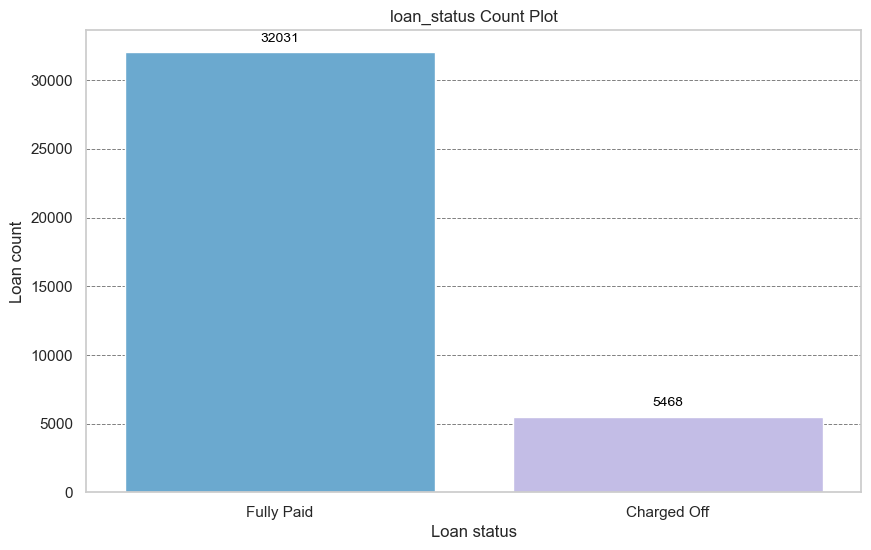

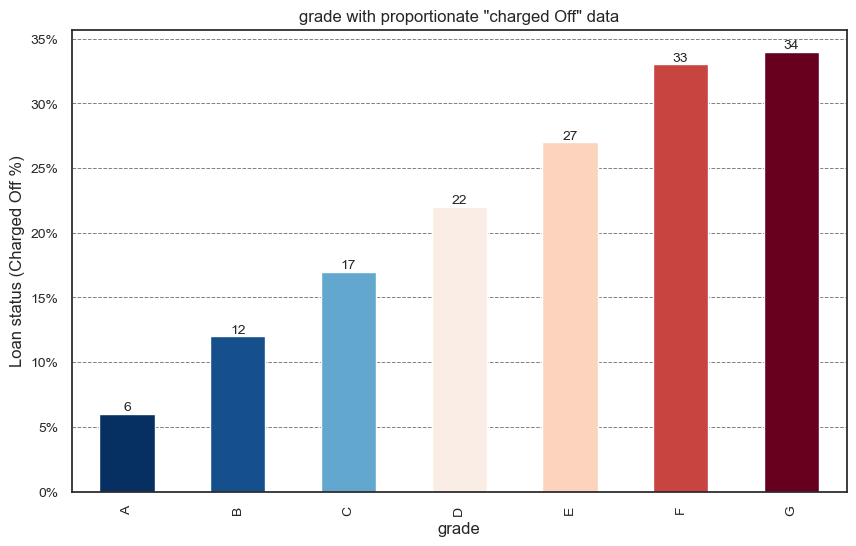

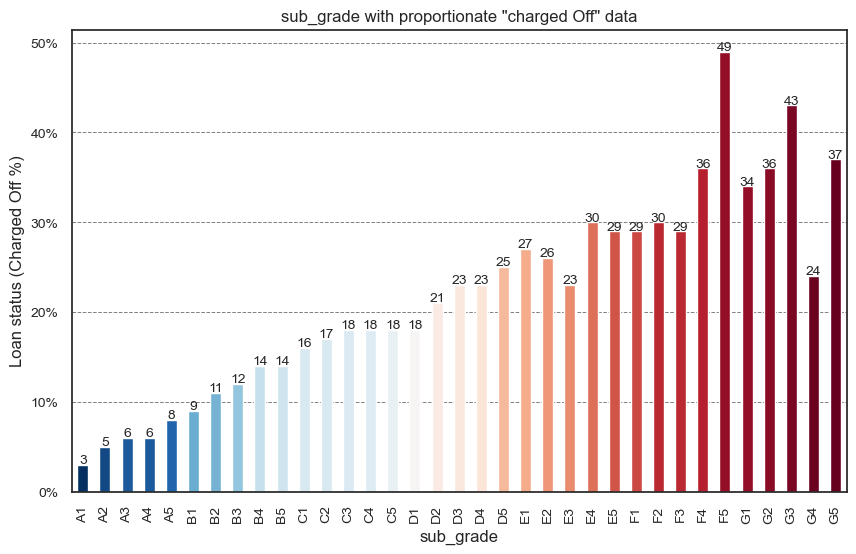

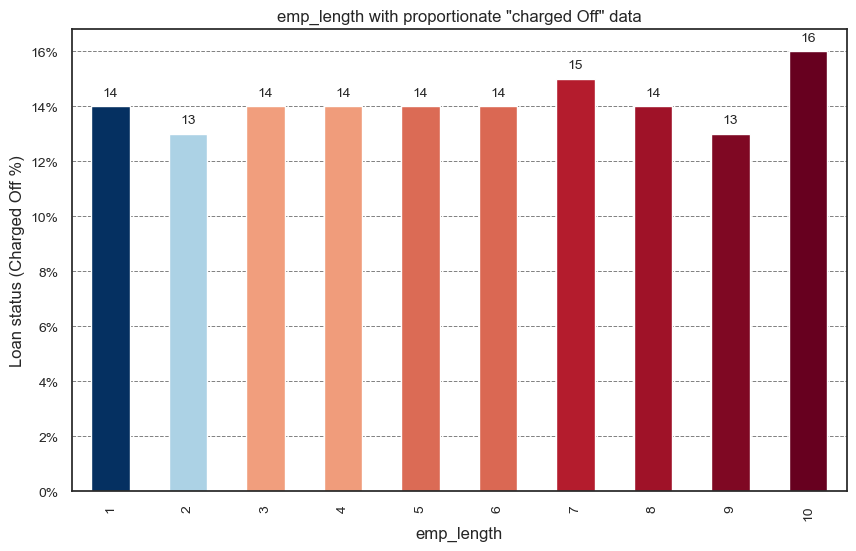

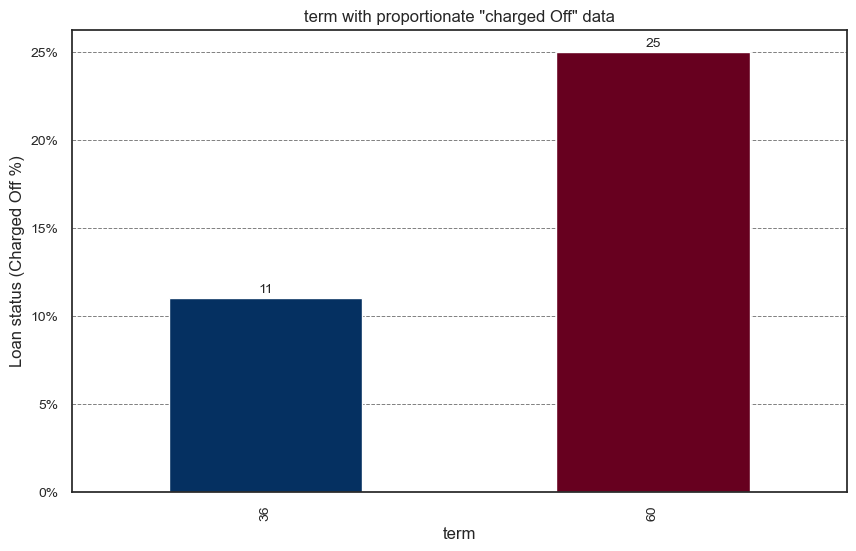

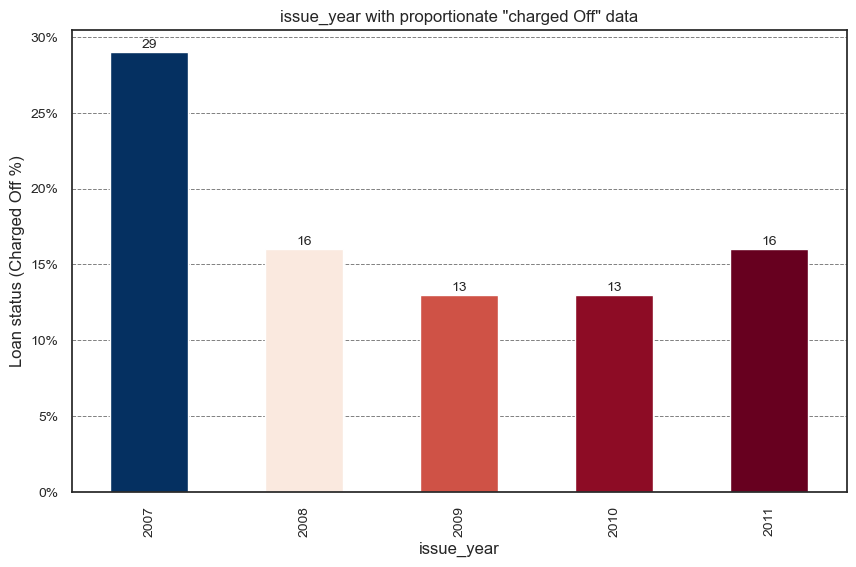

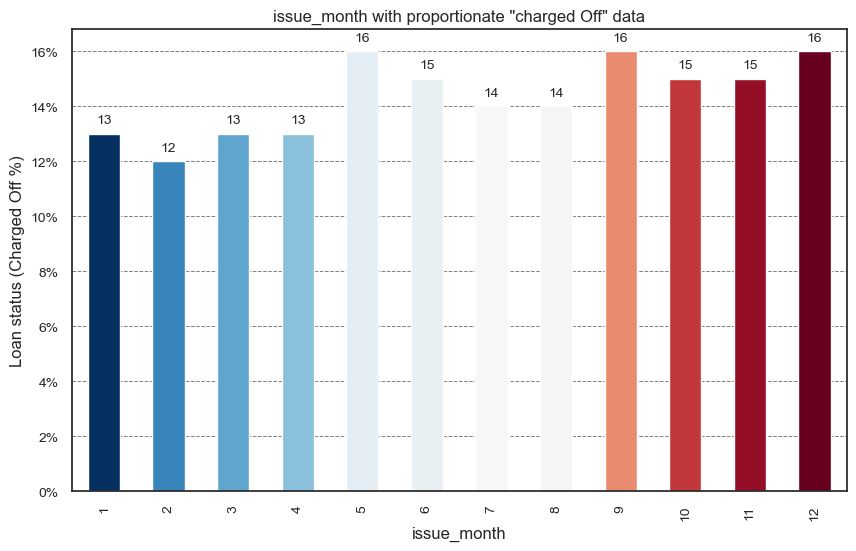

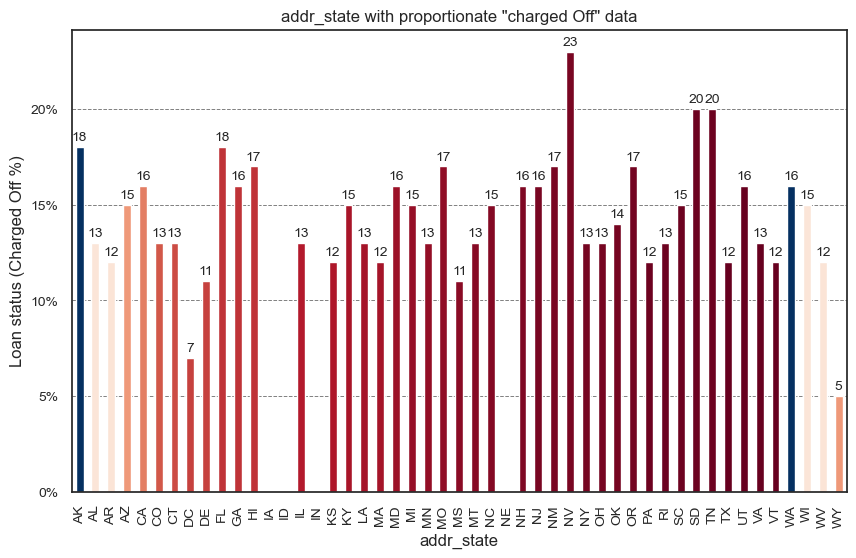

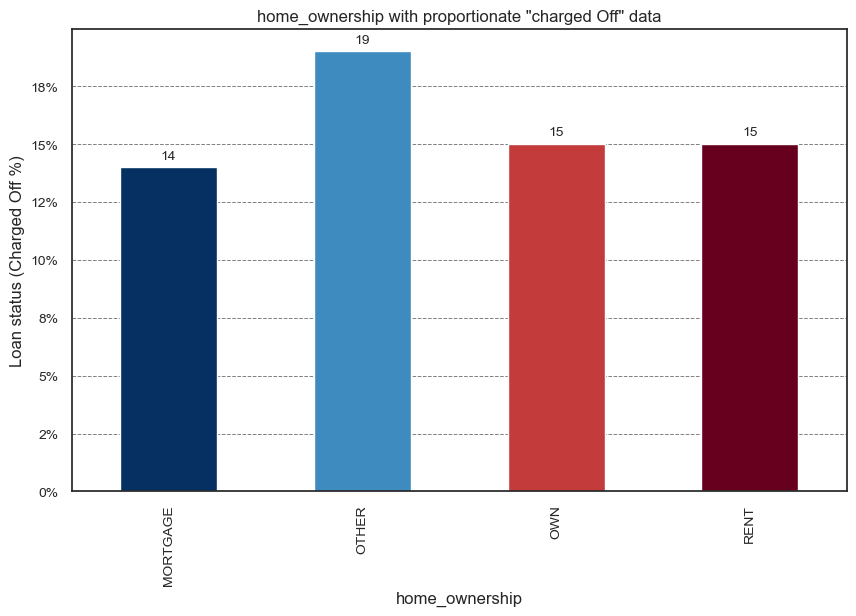

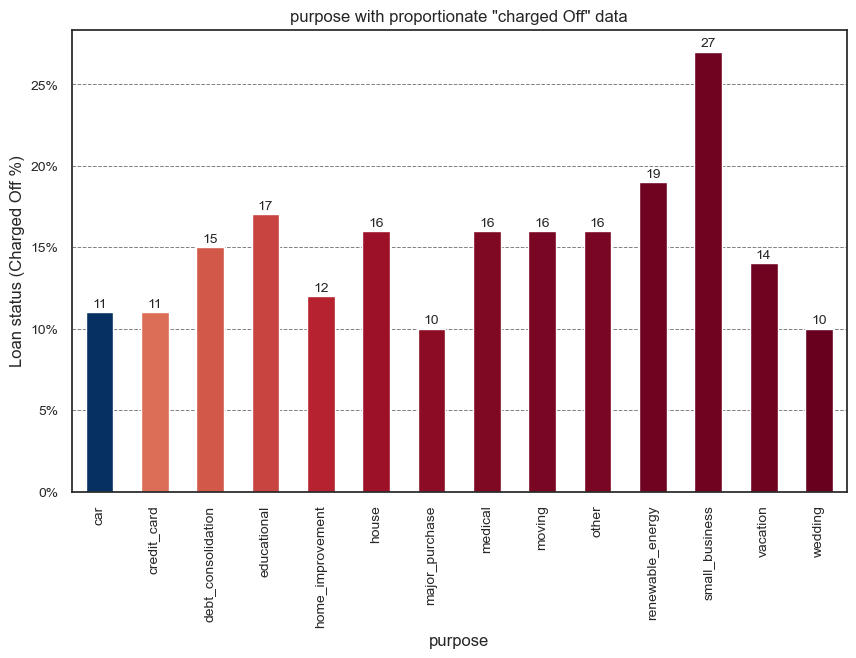

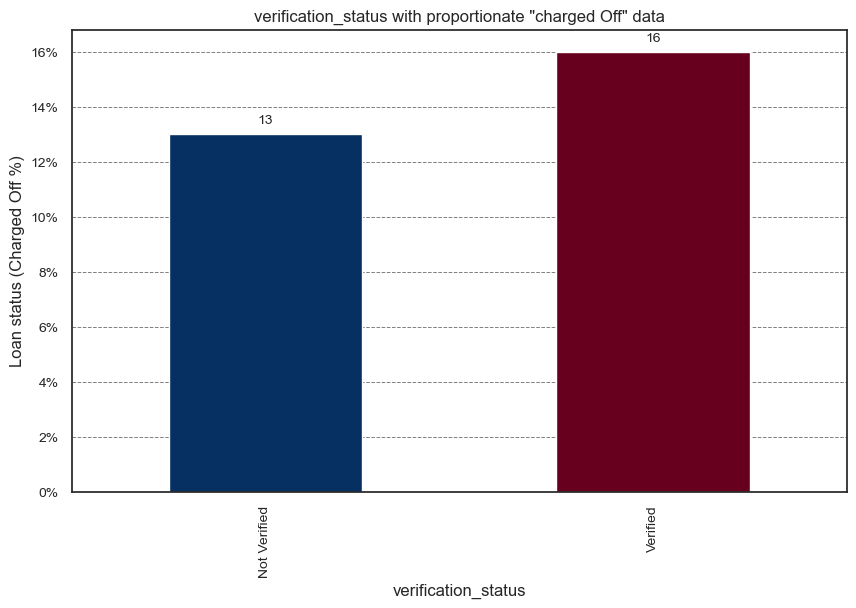

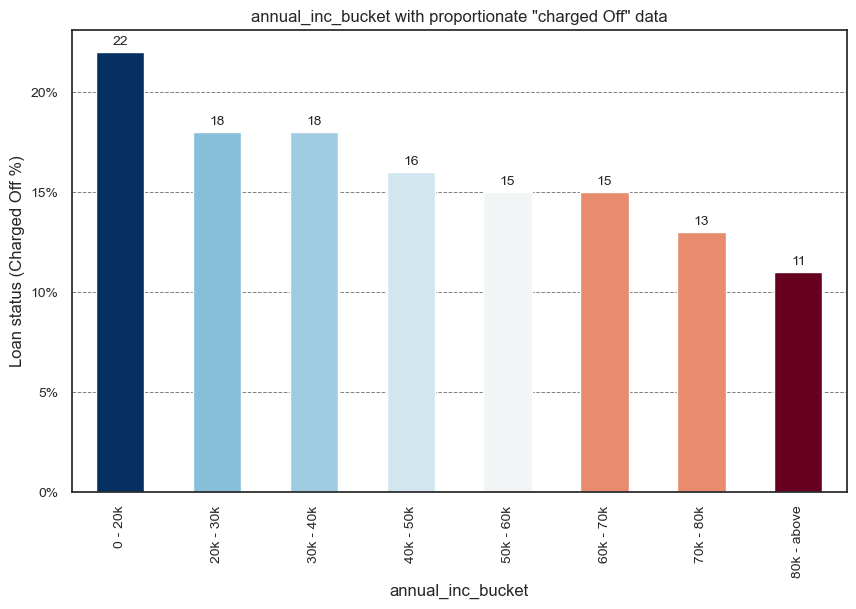

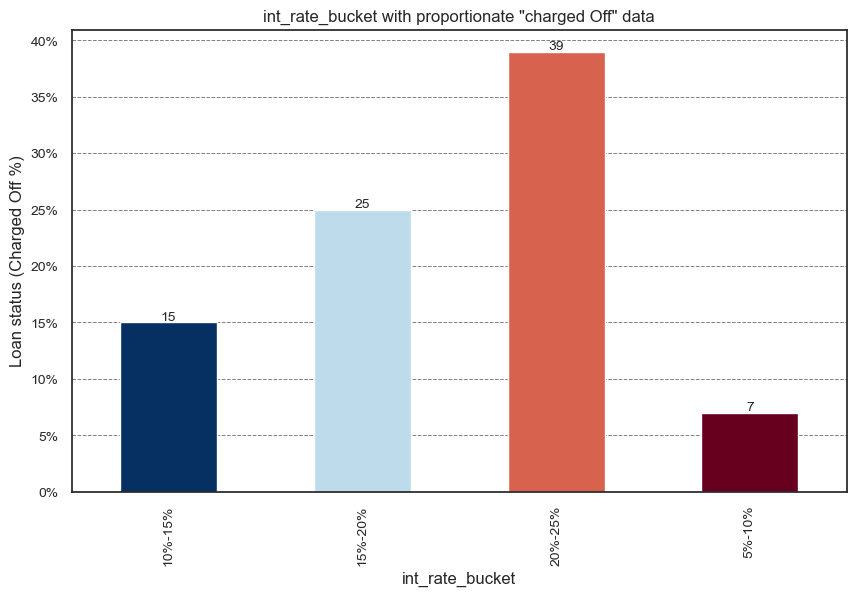

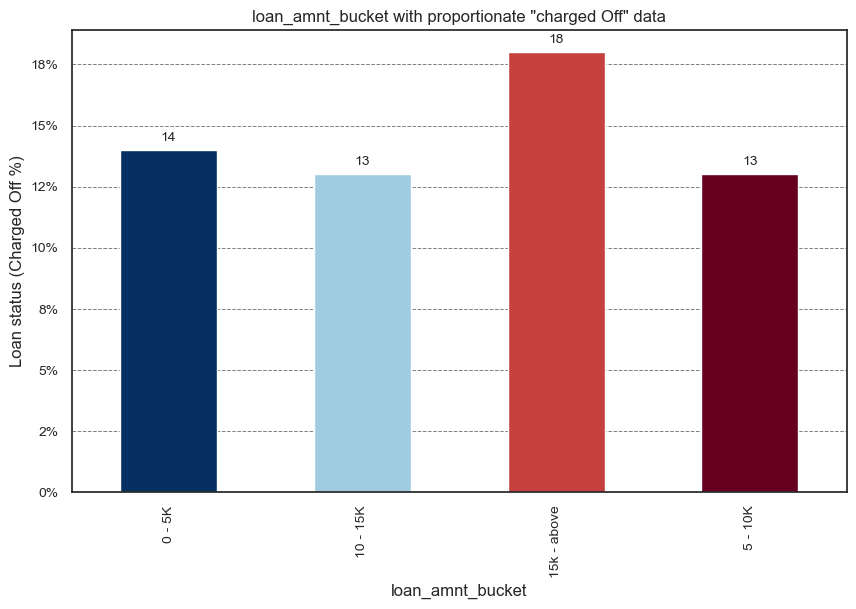

In [27]:
render_count_plot(loan_df, 'loan_status', 'loan_status', 'Loan status')
render_bar_chart(loan_df, 'grade', 'loan_status', 'Charged Off')
render_bar_chart(loan_df, 'sub_grade', 'loan_status', 'Charged Off')
render_bar_chart(loan_df, 'emp_length', 'loan_status', 'Charged Off')
render_bar_chart(loan_df, 'term', 'loan_status', 'Charged Off')
render_bar_chart(loan_df, 'issue_year', 'loan_status', 'Charged Off')
render_bar_chart(loan_df, 'issue_month', 'loan_status', 'Charged Off')

render_bar_chart(loan_df, 'addr_state', 'loan_status', 'Charged Off')
render_bar_chart(loan_df, 'home_ownership', 'loan_status', 'Charged Off')
render_bar_chart(loan_df, 'purpose', 'loan_status', 'Charged Off')
render_bar_chart(loan_df, 'verification_status', 'loan_status', 'Charged Off')

render_bar_chart(loan_df, 'annual_inc_bucket', 'loan_status', 'Charged Off')
render_bar_chart(loan_df, 'int_rate_bucket', 'loan_status', 'Charged Off')
render_bar_chart(loan_df, 'loan_amnt_bucket', 'loan_status', 'Charged Off')

## Bivariate Analysis

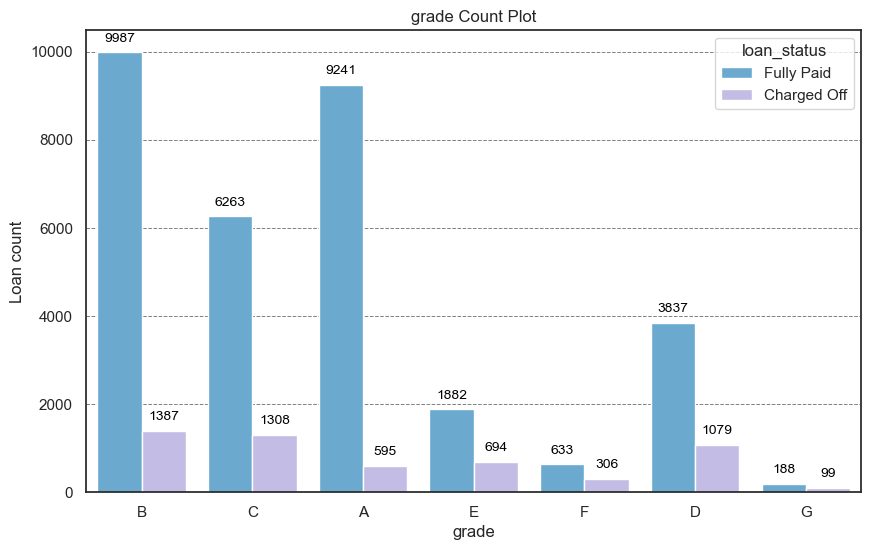

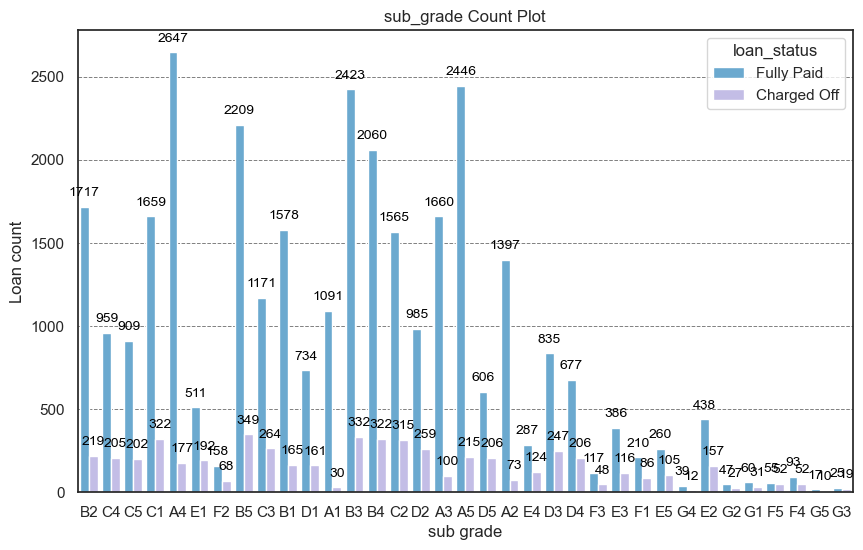

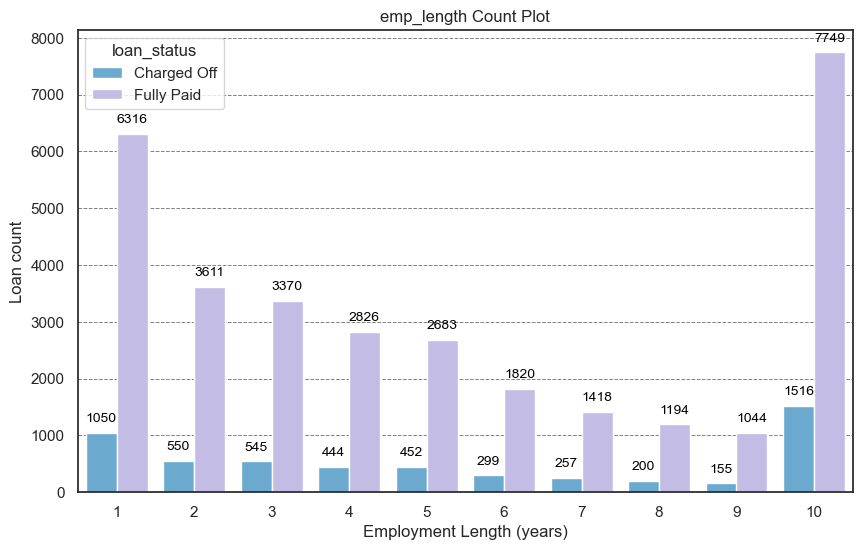

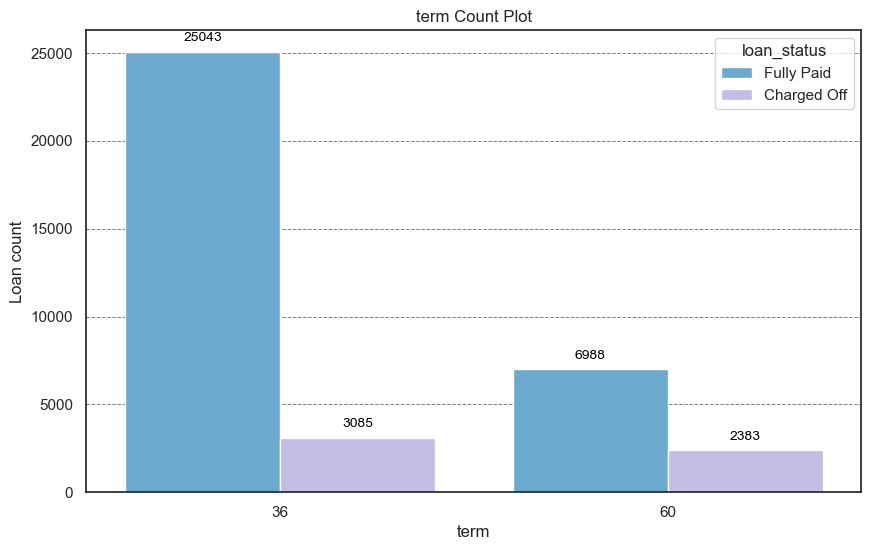

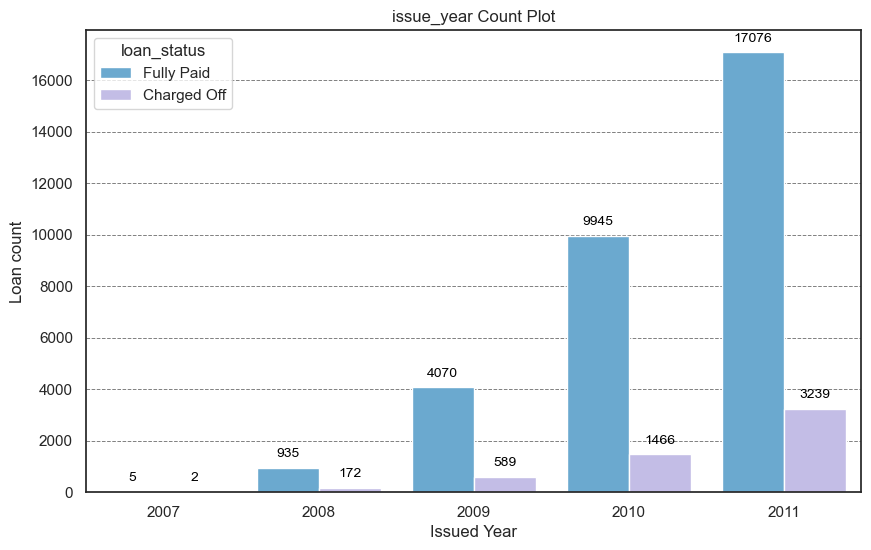

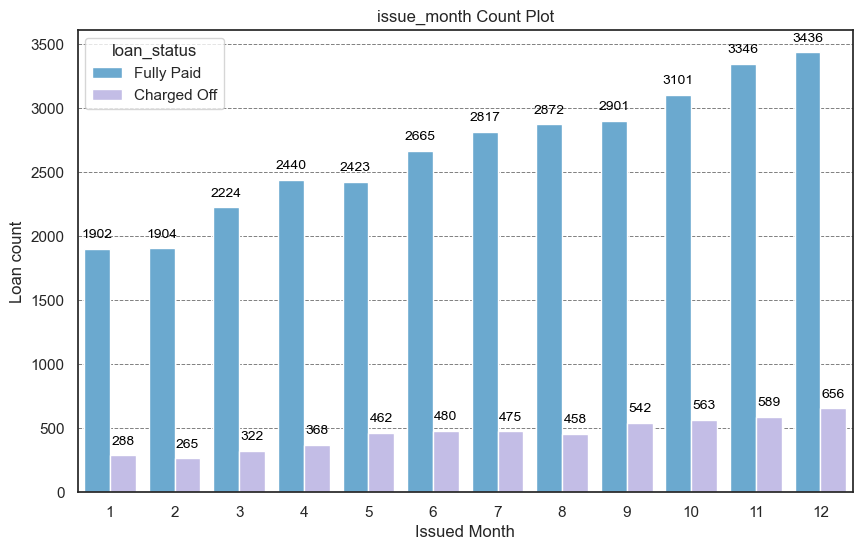

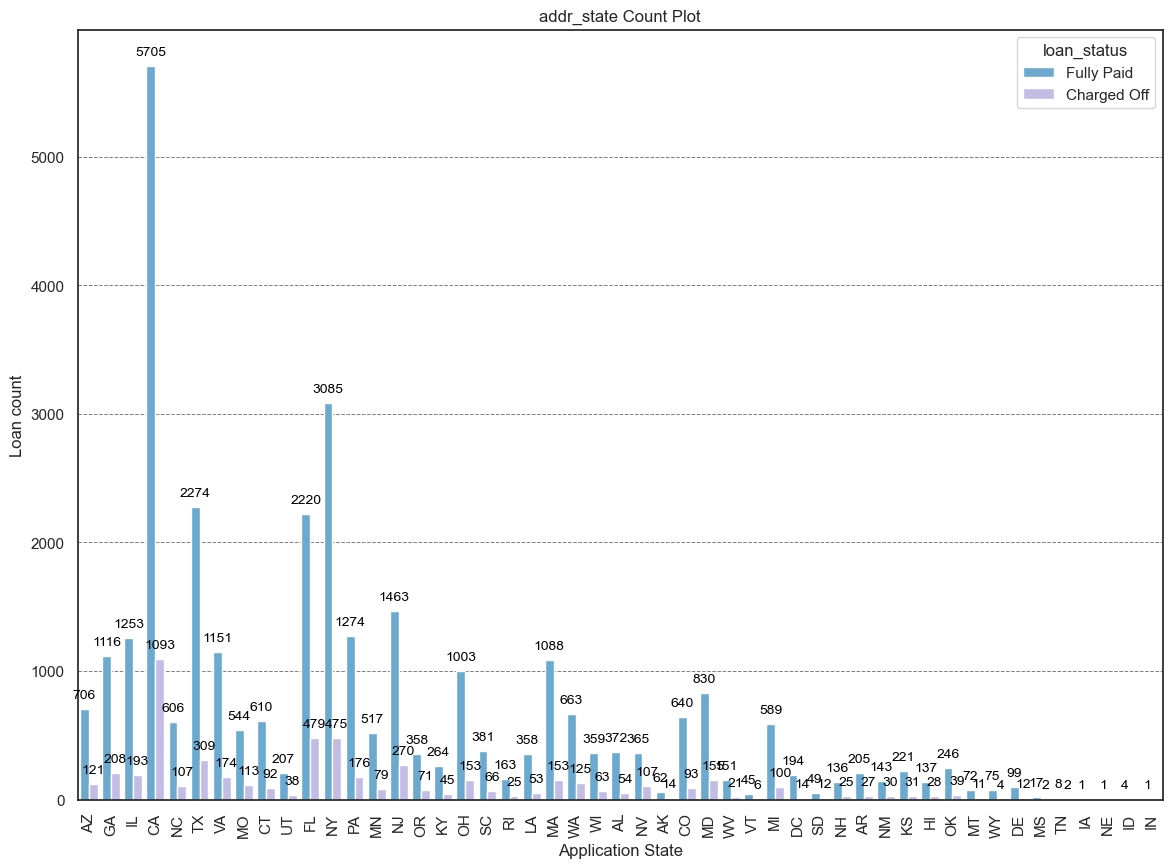

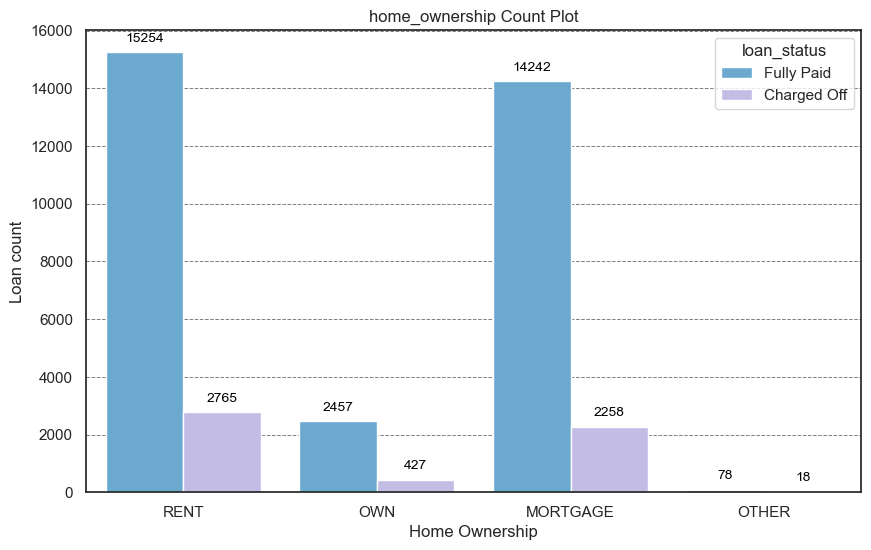

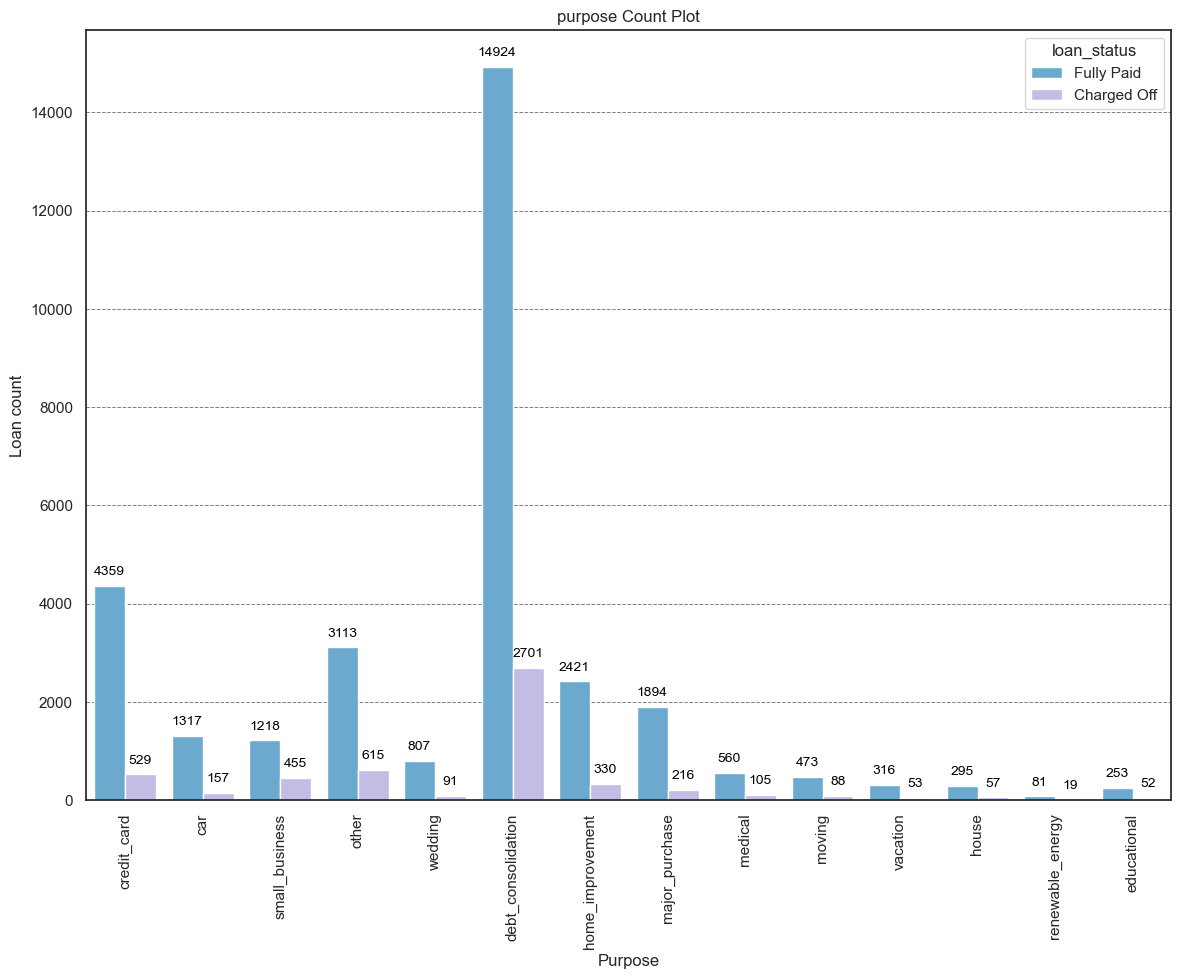

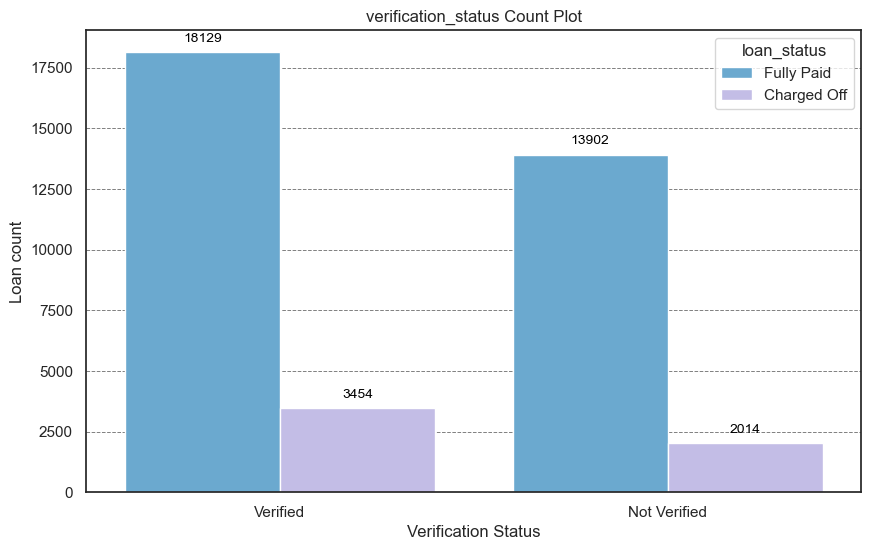

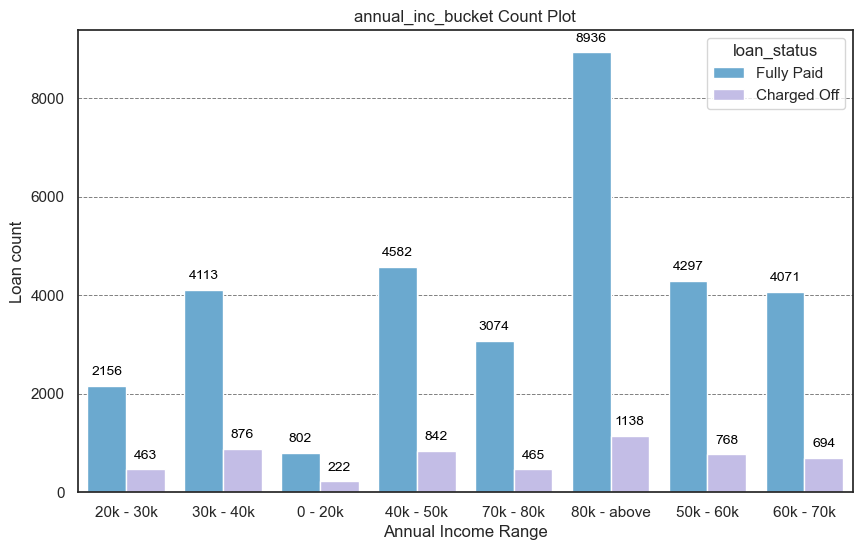

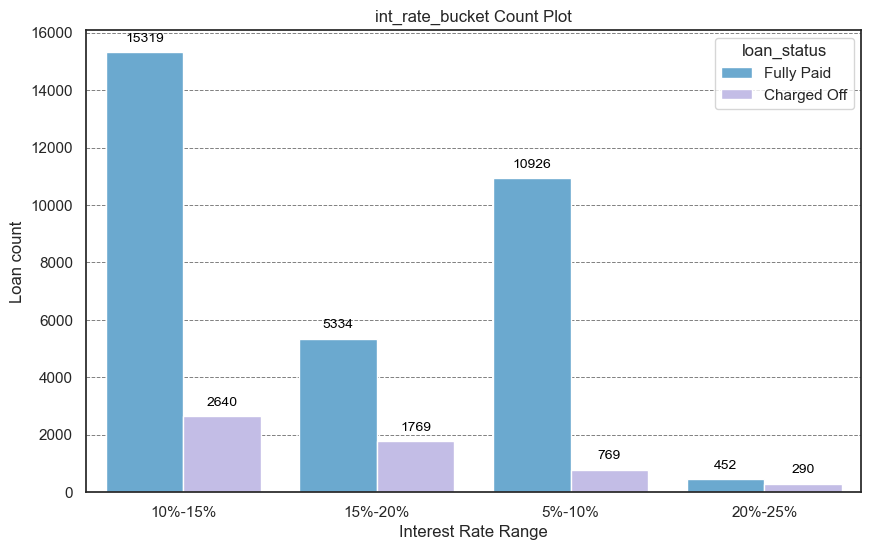

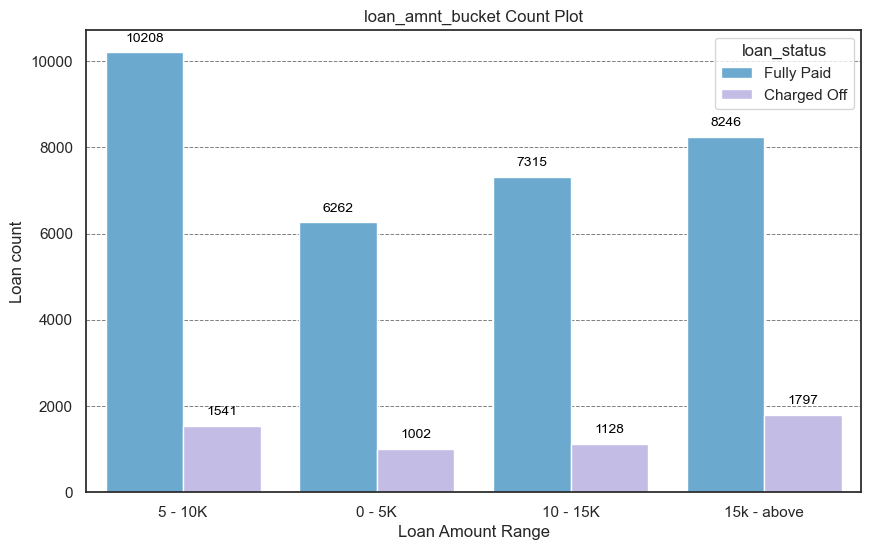

In [28]:
render_count_plot(loan_df, 'grade', 'loan_status', 'grade')
render_count_plot(loan_df, 'sub_grade', 'loan_status', 'sub grade')
render_count_plot(loan_df, 'emp_length', 'loan_status', 'Employment Length (years)')
render_count_plot(loan_df, 'term', 'loan_status', 'term')
render_count_plot(loan_df, 'issue_year', 'loan_status', 'Issued Year')
render_count_plot(loan_df, 'issue_month', 'loan_status', 'Issued Month')

render_count_plot(loan_df, 'addr_state', 'loan_status', 'Application State', True)
render_count_plot(loan_df, 'home_ownership', 'loan_status', 'Home Ownership')
render_count_plot(loan_df, 'purpose', 'loan_status', 'Purpose', True)
render_count_plot(loan_df, 'verification_status', 'loan_status', 'Verification Status')

render_count_plot(loan_df, 'annual_inc_bucket', 'loan_status', 'Annual Income Range')
render_count_plot(loan_df, 'int_rate_bucket', 'loan_status', 'Interest Rate Range')
render_count_plot(loan_df, 'loan_amnt_bucket', 'loan_status', 'Loan Amount Range')

        

## Multivariate Analysis

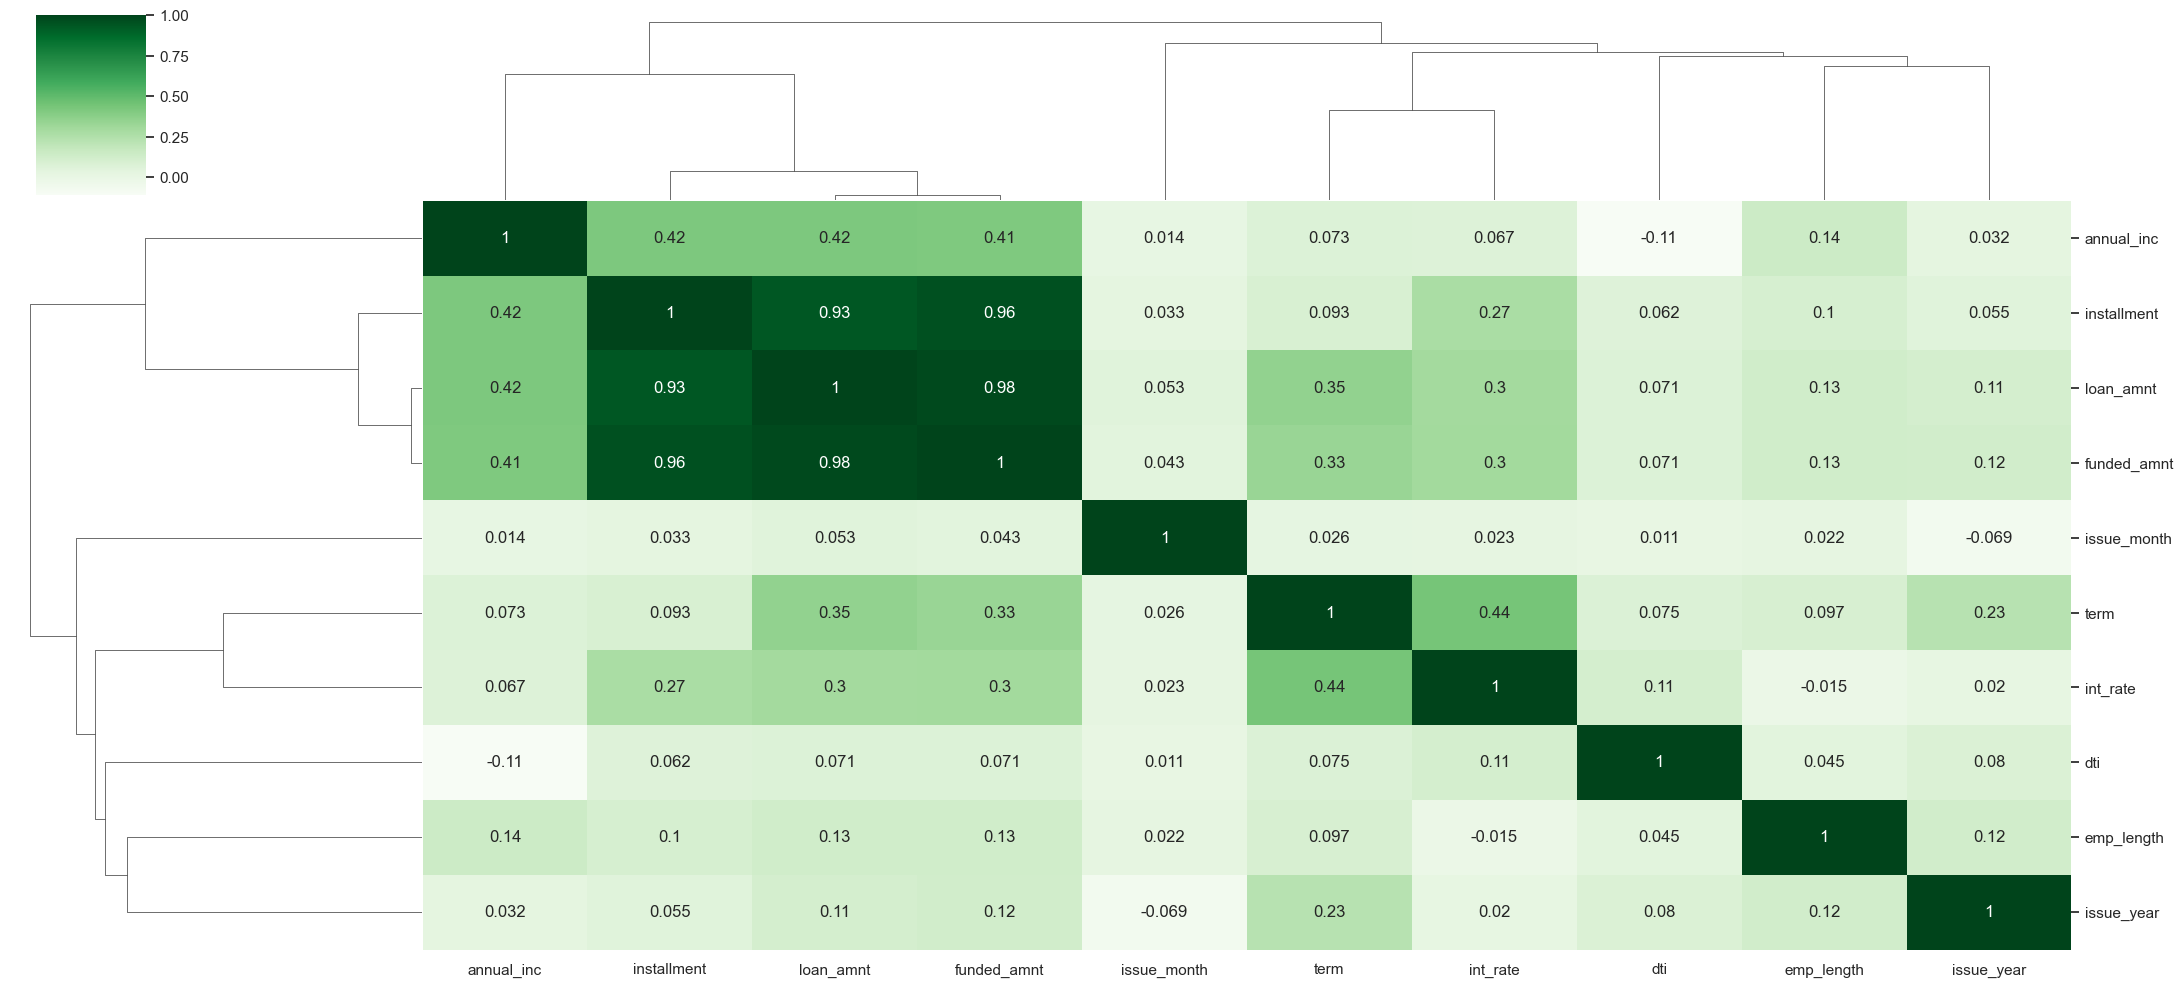

In [29]:
loan_correlation = loan_df[['loan_amnt', 'annual_inc', 'installment', 'funded_amnt', 'dti', 'term', 'int_rate', 'emp_length', 'issue_year', 'issue_month']].corr()
sns.clustermap(loan_correlation, cmap='Greens', annot=True, figsize=(22, 10))
plt.show()

## Correlation Metrics Insights
Installment has a strong correlation with loan_amnt, funded_amnt, and annual income.
term` has a good correlation with interest rate


Employment length has a very weak correlation with most of the parameters.
Issues month and year also have no correlation with any parameter.

# Summary of the Analysis
##### Almost 14% of loans are charged off.
##### Grade E, F, & G loans are the major defaulters and have been correctly graded. Grades are the strongest predictor of the default. 
##### Grade A has the least defaulters but still got some defaulters; grading could be done better to minimize the defaulters in Grade A to avoid business losses.
##### Loans with subgrades of F and G are the major defaulters.
##### Employment length has no impact on the defaulting, and we can see across the range of the experience that people are defaulting.
##### A loan with the longer term has almost double the chance of defaulting compared to a short term; the company should promote short-term goals.
##### Given numbers of loans were less in 2007, almost 29% got charged off.
##### February is the month where the least number of loans has been issued; this is in sync with the financial year cycle, because of March being the financial year end. This makes sense, and the last quarter of the year has the least number of loans issued.
##### WY state has the least defaulters, and NY has the maximum; this could also be because NY is the financial capital, and more loans are issued in NY; hence, more defaulters. CA has the maximum loans but average defaulters.
##### Home ownership is not a strong parameter to determine the defaulter.
##### Small businesses have seen the maximum defaulters; hence, the company should do more due diligence before giving loans in this sector. Bigger purchases seem to have minimum defaulters; it could also mean people with higher incomes doing those purchases and paying up the loans in time.
##### Surprisingly, verified loans have defaulted more, which is serious, and the company could do better here and make the verification process work in favor of the company by avoiding bad loans; this could also indicate corruption in the verification process.
##### People with higher annual incomes seem to be doing better, and companies should target loans to such profiles.
##### The highest interest rate loans are defaulting more; this makes sense, as usually not-so-good credit score profiles get loans at higher interest rates and get defaulted. The company could avoid such loans and make the best of the loans where interest rates are lowest.
##### Bigger loans seem to be defaulting more; the company can do more scrutiny here and try to bring down the loan amount for better outcomes for the company.
##### People with the maximum income are going for the maximum loans, which is good for the company as they default less.
